In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

c:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
greenhouse_data_path = "C:/Users/DELL/OneDrive/Desktop/ML1/GreenhouseClimate.csv"
weather_data_path = "C:/Users/DELL/OneDrive/Desktop/ML1/Weather.csv"
greenhouse_df = pd.read_csv(greenhouse_data_path)
weather_df = pd.read_csv(weather_data_path)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7472\1634612842.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  greenhouse_df = pd.read_csv(greenhouse_data_path)


In [3]:
greenhouse_df = greenhouse_df.apply(pd.to_numeric, errors='coerce')
weather_df = weather_df.apply(pd.to_numeric, errors='coerce')

In [4]:
merged_df = pd.merge(greenhouse_df, weather_df, on='%time', how='inner')

In [5]:
weather_features = ['Tout', 'Rhout', 'Iglob', 'Windsp']
climate_features = ['Rhair', 'CO2air', 'VentLee', 'Ventwind', 'PipeLow', 'PipeGrow', 'EnScr', 'BlackScr']
target = 'Tair'
columns_to_keep = weather_features + climate_features + [target]

In [6]:
relevant_data = merged_df[columns_to_keep]

In [7]:
cleaned_data = relevant_data.fillna(method='ffill').fillna(method='bfill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7472\1065506578.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = relevant_data.fillna(method='ffill').fillna(method='bfill')


In [8]:
X = cleaned_data[weather_features + climate_features]
y = cleaned_data[target]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [27]:
svr = SVR(kernel='rbf', C=4.0, epsilon=0.05, gamma=0.05)
svr.fit(X_train, y_train)

SVR(C=4.0, epsilon=0.05, gamma=0.05)

In [28]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [29]:
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("R-squared Training (R2):", train_r2)
print("R-squared Testing (R2):", test_r2)

Mean Squared Error (MSE): 2.0804577639052746
Mean Absolute Error (MAE): 1.127179034083933
R-squared Training (R2): 0.8698923460054225
R-squared Testing (R2): 0.8440043915161853


In [26]:
print(svr.gamma)

0.01


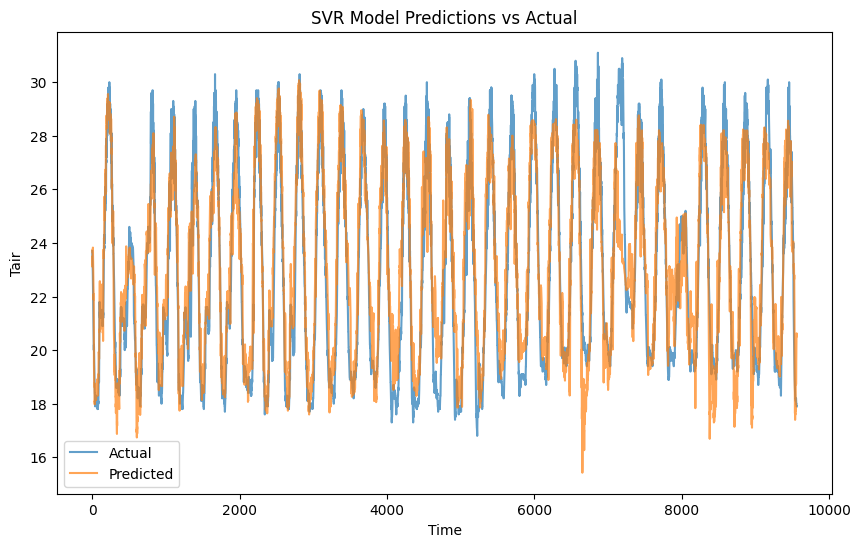

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_test_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("SVR Model Predictions vs Actual")
plt.xlabel("Time")
plt.ylabel("Tair")
plt.show()